In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report

from amb_sdk.sdk import DarwinSdk
import datetime
ts = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())

In [2]:
# Login
from login import username, password
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user(username, password)

if not status:
    print(msg)
else:
    print('You are logged in!')

You are logged in!


In [49]:
def get_formatted_dataframe(xls_file, year):
    df = pd.read_excel(xls_file)
    df = df[['DZRATING', 'DZCAMPUS','DPETALLC','DA0AT' + str(year) + 'R', 'DA0912DR' + str(year) + 'R','DAGC4X' + str(year) + 'R','DAGC5X' + str(year - 1) + 'R','DA0GR' + str(year) + 'N','DA0CT' + str(year) + 'R','DA0CC' + str(year) + 'R','DA0CSA' + str(year) + 'R','DA0CAA' + str(year) + 'R','DPSTTOSA','DPSTEXPA','DPFRAALLT','DPFRAALLK','DPFRASTAP','DZRVLOCP','DPFRAFEDP','DPFEAINST','DPFEAINSK','DISTSIZE','COMMTYPE', 'PROPWLTH', 'TAXRATE']]
    df = df.rename(index=str, columns = {"DZRATING":"rating", "DZCAMPUS":"num_schools", "DPETALLC":"num_students", "DA0AT" + str(year) + "R":"attendance_rate", "DA0912DR" + str(year) + "R":"dropout_rate", "DAGC4X" + str(year) + "R":"grad_rate_4_year", "DAGC5X" + str(year - 1) + "R":"grad_rate_5_year", "DA0GR" + str(year) + "N":"annual_grad_count", "DA0CT" + str(year) + "R":"college_admissions_per_tested", "DA0CC" + str(year) + "R":"college_admissions_at_crit", "DA0CSA" + str(year) + "R":"average_sat", "DA0CAA" + str(year) + "R":"average_act", "DPSTTOSA":"average_teacher_salary", "DPSTEXPA":"average_teacher_exp", "DPFRAALLT":"total_revenue", "DPFRAALLK":"total_revenue_per_pupil", "DPFRASTAP":"percent_revenue_from_state", "DZRVLOCP":"percent_revenue_from_local", "DPFRAFEDP":"percent_revenue_from_federal", "DPFEAINST":"instr_expenditures", "DPFEAINSK":"instr_expenditures_per_pupil", "DISTSIZE":"district_size", "COMMTYPE":"community_type", "PROPWLTH":"property_wealth", "TAXRATE":"tax_rate"})
    return df

In [56]:
test_df = get_formatted_dataframe('2016-2017.xls', 16)
train_df = get_formatted_dataframe('2015-2016.xls',15))
train_df = train_df.append(get_formatted_dataframe('2014-2015.xls',14))
train_df = train_df.append(get_formatted_dataframe('2013-2014.xls',13))
print('Test dataframe shape:', test_df.shape)
print('Train dataframe shape:', train_df.shape)

NameError: name 'train_df' is not defined

In [5]:
df[0:len(df)//5].to_csv('test_data.csv')
df[len(df)//5:].to_csv('train_data.csv')

In [6]:
TRAIN_DATASET='train_data.csv'
TEST_DATASET = 'test_data.csv'
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')
status, dataset = ds.upload_dataset( TRAIN_DATASET)
if not status:
    print(dataset)

400: BAD REQUEST - {"message": "Dataset already exists"}



In [7]:
#clean train_Set
target = "rating"
status, job_id = ds.clean_data(TRAIN_DATASET, target = target)
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-16T14:38:00.45154', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['train_data.csv'], 'artifact_names': ['1bf059741f6d4eac85eec056fc07ecda'], 'model_name': None, 'job_error': None}
{'status': 'Requested', 'starttime': '2019-04-16T14:38:00.45154', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['train_data.csv'], 'artifact_names': ['1bf059741f6d4eac85eec056fc07ecda'], 'model_name': None, 'job_error': None}
{'status': 'Requested', 'starttime': '2019-04-16T14:38:00.45154', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['train_data.csv'], 'artifact_names': ['1bf059741f6d4eac85eec056fc07ecda'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-16T14:38:00.45154', 'endtime': '2019-04-16T14:38:

In [8]:
model = target + "_model01" + ts
status, job_id = ds.create_model(dataset_names = TRAIN_DATASET, \
                                 model_name =  model, \
                                 max_train_time = '00:05')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-16T14:38:46.910854', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['train_data.csv'], 'artifact_names': None, 'model_name': 'rating_model0120190416143758', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-16T14:38:46.910854', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['train_data.csv'], 'artifact_names': None, 'model_name': 'rating_model0120190416143758', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-16T14:38:46.910854', 'endtime': None, 'percent_complete': 1, 'job_type': 'TrainModel', 'loss': 0.8089041709899902, 'generations': 4, 'dataset_names': ['train_data.csv'], 'artifact_names': None, 'model_name': 'rating_model0120190416143758', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-16T14:38:46.910854', 'endtime': None, 'percent_complete': 1, 'job_type': 'Tra

In [9]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])


{'status': 'Running', 'starttime': '2019-04-16T14:41:03.824143', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.18174345791339874, 'generations': 4, 'dataset_names': None, 'artifact_names': ['29ce170832584d6a99705d06cc2a5904'], 'model_name': 'rating_model0120190416143758', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-16T14:41:03.824143', 'endtime': '2019-04-16T14:41:11.666787', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.18174345791339874, 'generations': 4, 'dataset_names': None, 'artifact_names': ['29ce170832584d6a99705d06cc2a5904'], 'model_name': 'rating_model0120190416143758', 'job_error': ''}


In [10]:
feature_importance[:10]

grad_rate_4_year                 0.146070
attendance_rate                  0.109065
dropout_rate                     0.083721
grad_rate_6_year                 0.079548
grad_rate_5_year                 0.074915
instr_expenditures_per_pupil     0.067364
percent_revenue_from_local       0.046655
college_admissions_per_tested    0.040852
instr_expenditures               0.038538
annual_grad_count                0.036791
dtype: float64

In [24]:
status, artifact = ds.run_model(TRAIN_DATASET, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-16T14:45:24.508451', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.18174345791339874, 'generations': 4, 'dataset_names': ['train_data.csv'], 'artifact_names': ['1387d43c23a34003a39c447e7bc3fb8e'], 'model_name': 'rating_model0120190416143758', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-16T14:45:24.508451', 'endtime': '2019-04-16T14:45:32.493884', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.18174345791339874, 'generations': 4, 'dataset_names': ['train_data.csv'], 'artifact_names': ['1387d43c23a34003a39c447e7bc3fb8e'], 'model_name': 'rating_model0120190416143758', 'job_error': ''}


(True, 'Job completed')

In [25]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,prob_Improvement Required,prob_Met Alternative Standard,prob_Met Standard,prob_Not Rated,rating
0,0.029143,0.001922,0.968070,0.000866,Met Standard
1,0.050353,0.000333,0.939006,0.010308,Met Standard
2,0.055791,0.003938,0.938799,0.001472,Met Standard
3,0.008780,0.000144,0.990631,0.000445,Met Standard
4,0.018067,0.002117,0.978760,0.001055,Met Standard


In [26]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

ValueError: operands could not be broadcast together with shapes (963,) (1203,) (963,) 

In [27]:
status, job_id = ds.clean_data(TEST_DATASET, target = target, model_name = model)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-16T14:45:49.557721', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['test_data.csv'], 'artifact_names': ['a84be2323245447fb5a9ba7db0471110'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-16T14:45:49.557721', 'endtime': '2019-04-16T14:45:51.096829', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['test_data.csv'], 'artifact_names': ['a84be2323245447fb5a9ba7db0471110'], 'model_name': None, 'job_error': ''}


In [29]:
status, artifact = ds.run_model(TEST_DATASET, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Complete', 'starttime': '2019-04-16T14:46:09.115304', 'endtime': '2019-04-16T14:46:09.94157', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.18174345791339874, 'generations': 4, 'dataset_names': ['test_data.csv'], 'artifact_names': ['8b5e69ebff544039b98a2c9095e59c2d'], 'model_name': 'rating_model0120190416143758', 'job_error': ''}


(True, 'Job completed')

                          precision    recall  f1-score   support

    Improvement Required       0.00      0.00      0.00         8
Met Alternative Standard       0.80      0.67      0.73         6
            Met Standard       0.96      0.99      0.97       225
               Not Rated       0.25      1.00      0.40         1

             avg / total       0.92      0.95      0.93       240



/home/brandon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


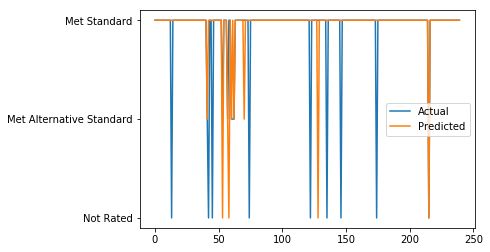

In [30]:
# Create plots comparing predictions with actual target
status, prediction = ds.download_artifact(artifact['artifact_name'])
df = pd.read_csv(TEST_DATASET)
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [21]:
#TEST DATASET
status, dataset = ds.upload_dataset( TEST_DATASET)
if not status:
    print(dataset)